In [2]:
#importing packages

import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import shapely 
from shapely import BufferCapStyle, BufferJoinStyle

In [3]:
dir = 'N:/isipd/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/CTD/'

july20 = pd.read_csv(dir + "20jul.txt")
july24 = pd.read_csv(dir + "24jul.txt")
july = pd.concat(july20, july24)

TypeError: concat() takes 1 positional argument but 2 were given

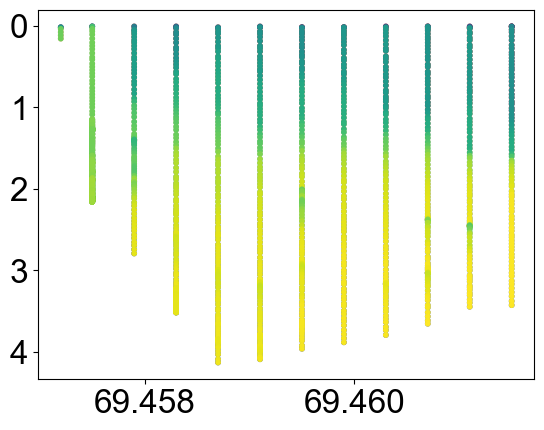

In [ ]:

plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['font.size'] = 24

global_min_temp = july['Temperature'].min()
global_max_temp = july['Temperature'].max()
global_min_cond = july['Conductivity'].min()
global_max_cond = july['Conductivity'].max()

latitude20 = july20['latitude'].values
depth20 = july20['depth'].values
temperature20 = july20['Temperature'].values
conductivity20 = july20['Conductivity'].values

latitude24 = july24['latitude'].values
depth24 = july24['depth'].values
temperature24 = july24['Temperature'].values
conductivity24 = july24['Conductivity'].values

fig, ax = plt.subplots(2, 2, figsize=(16, 16))

# Create a scatter plot on the current subplot
plt.scatter(latitude20, depth20, c=temperature20, cmap='coolwarm', s=10, ax=ax[0][0], vmin=global_min_temp, vmax=global_max_temp)
plt.scatter(latitude20, depth20, c=conductivity20, cmap='viridis',s=10, ax=ax[1][0], vmin=global_min_cond, vmax=global_max_cond)
plt.scatter(latitude24, depth24, c=temperature24, cmap='coolwarm', s=10, ax=ax[0][1], vmin=global_min_temp, vmax=global_max_temp)
plt.scatter(latitude24, depth24, c=conductivity24, cmap='viridis',s=10, ax=ax[1][1], vmin=global_min_cond, vmax=global_max_cond)

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # position of colorbar axis: [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Temperature (°C)')
ax.invert_yaxis()

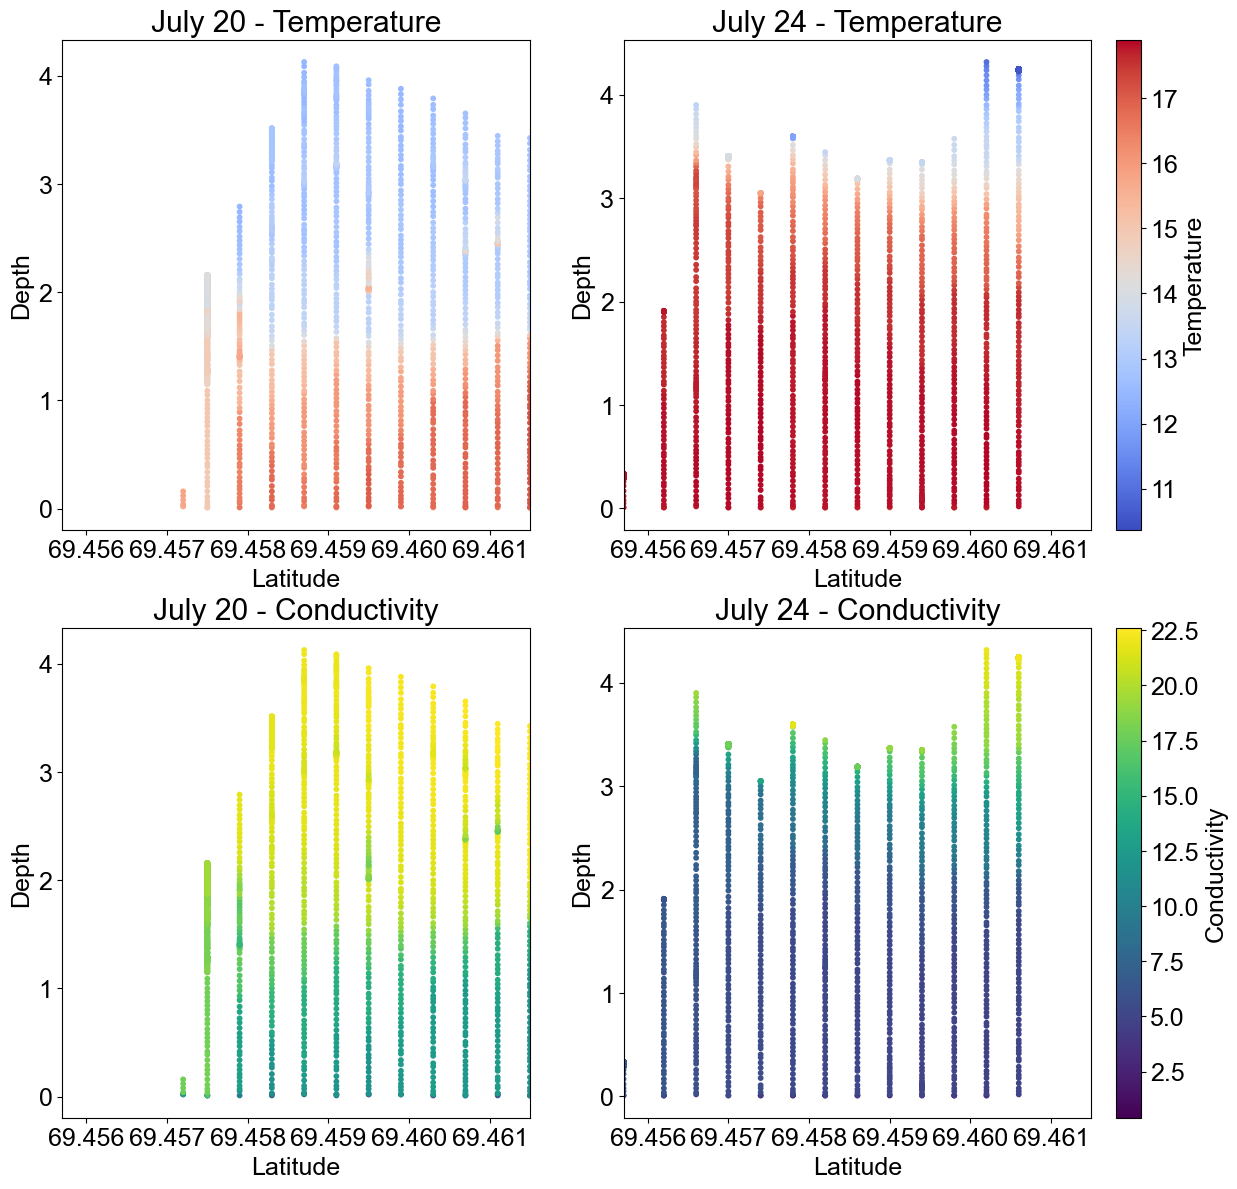

In [34]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['font.size'] = 18

# Example data (replace with your actual data)
latitude20 = july20['latitude'].values
depth20 = july20['depth'].values
temperature20 = july20['Temperature'].values
conductivity20 = july20['Conductivity'].values

latitude24 = july24['latitude'].values
depth24 = july24['depth'].values
temperature24 = july24['Temperature'].values
conductivity24 = july24['Conductivity'].values

global_min_temp = min(temperature20.min(), temperature24.min())
global_max_temp = max(temperature20.max(), temperature24.max())
global_min_cond = min(conductivity20.min(), conductivity24.min())
global_max_cond = max(conductivity20.max(), conductivity24.max())
global_min_lat = min(latitude20.min(), latitude24.min())
global_max_lat = max(latitude20.max(), latitude24.max())

fig, ax = plt.subplots(2, 2, figsize=(16, 14))

# Row 1: Temperature plots
scatter_temp_20 = ax[0, 0].scatter(latitude20, depth20, c=temperature20, cmap='coolwarm', s=10, vmin=global_min_temp, vmax=global_max_temp)
scatter_temp_24 = ax[0, 1].scatter(latitude24, depth24, c=temperature24, cmap='coolwarm', s=10, vmin=global_min_temp, vmax=global_max_temp)

# Add vertical colorbar for temperature row (shared between two plots)
cbar_temp = fig.colorbar(scatter_temp_20, ax=ax[0, :], orientation='vertical', pad=0.02)
cbar_temp.set_label('Temperature')

# Row 2: Conductivity plots
scatter_cond_20 = ax[1, 0].scatter(latitude20, depth20, c=conductivity20, cmap='viridis', s=10, vmin=global_min_cond, vmax=global_max_cond)
scatter_cond_24 = ax[1, 1].scatter(latitude24, depth24, c=conductivity24, cmap='viridis', s=10, vmin=global_min_cond, vmax=global_max_cond)

# Add vertical colorbar for conductivity row (shared between two plots)
cbar_cond = fig.colorbar(scatter_cond_20, ax=ax[1, :], orientation='vertical', pad=0.02)
cbar_cond.set_label('Conductivity')

# Add titles and labels
ax[0, 0].set_title('July 20 - Temperature')
ax[0, 1].set_title('July 24 - Temperature')
ax[1, 0].set_title('July 20 - Conductivity')
ax[1, 1].set_title('July 24 - Conductivity')

ax[0, 0].set_xlim(global_min_lat, global_max_lat)
ax[0, 1].set_xlim(global_min_lat, global_max_lat)
ax[1, 0].set_xlim(global_min_lat, global_max_lat)
ax[1, 1].set_xlim(global_min_lat, global_max_lat)

for a in ax.flat:
    a.set_xlabel('Latitude')
    a.set_ylabel('Depth')

#plt.tight_layout()
plt.show()


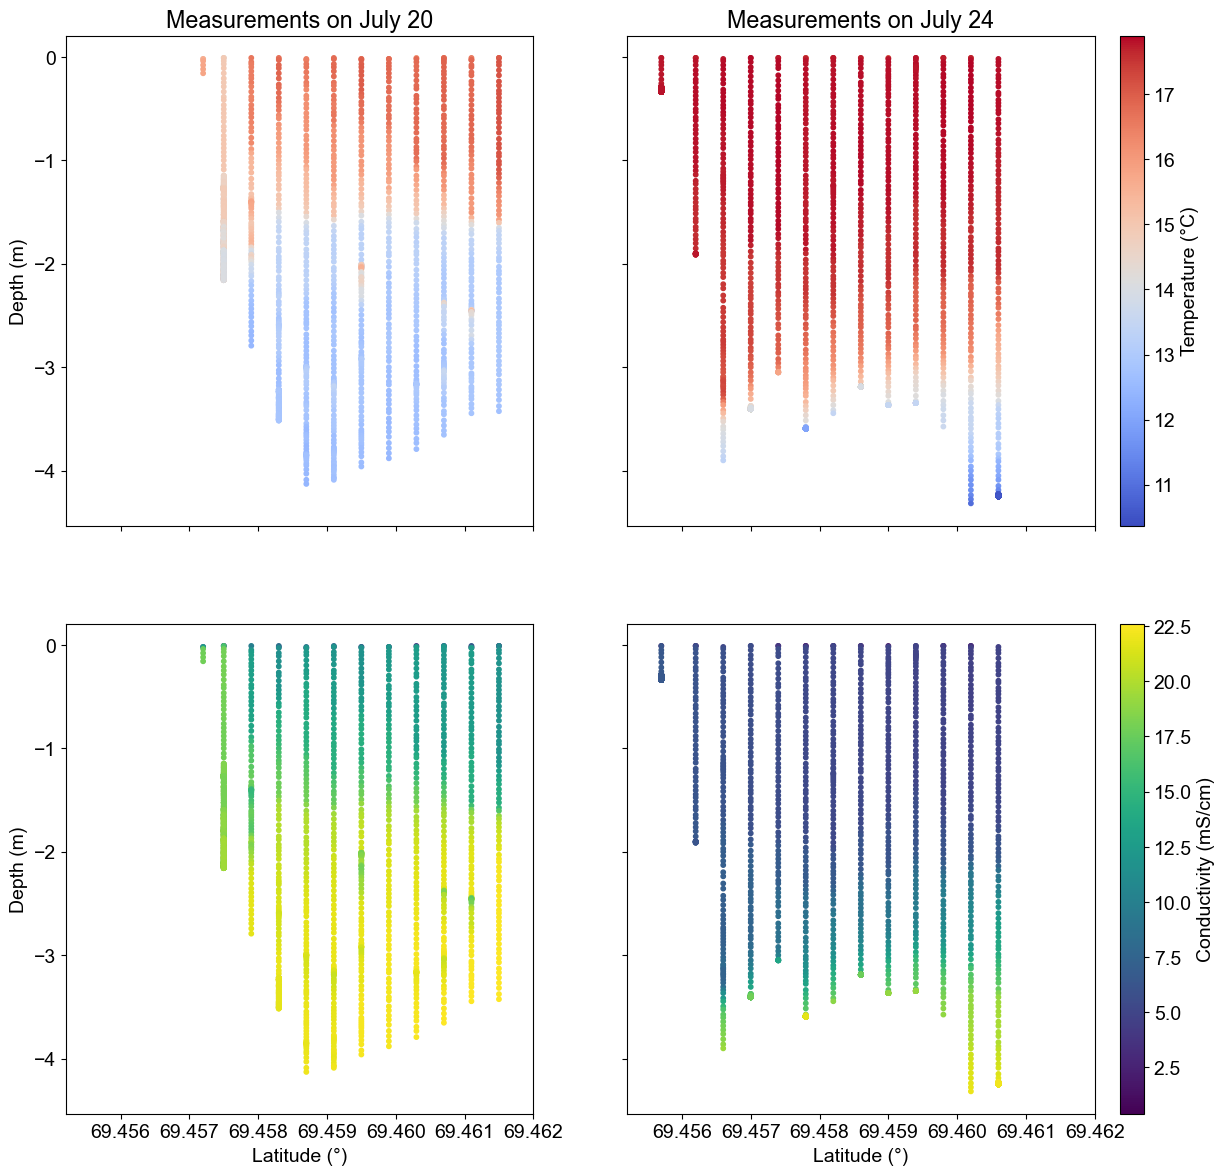

In [47]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')
plt.rcParams['font.size'] = 14

# Example data (replace with your actual data)
latitude20 = july20['latitude'].values
depth20 = july20['depth'].values*-1
temperature20 = july20['Temperature'].values
conductivity20 = july20['Conductivity'].values

latitude24 = july24['latitude'].values
depth24 = july24['depth'].values*-1
temperature24 = july24['Temperature'].values
conductivity24 = july24['Conductivity'].values

global_min_temp = min(temperature20.min(), temperature24.min())
global_max_temp = max(temperature20.max(), temperature24.max())
global_min_cond = min(conductivity20.min(), conductivity24.min())
global_max_cond = max(conductivity20.max(), conductivity24.max())
global_min_lat = min(latitude20.min(), latitude24.min())
global_max_lat = max(latitude20.max(), latitude24.max())

fig, ax = plt.subplots(2, 2, figsize=(16, 14), sharex='col', sharey='row')

# Row 1: Temperature plots
scatter_temp_20 = ax[0, 0].scatter(latitude20, depth20, c=temperature20, cmap='coolwarm', s=10, vmin=global_min_temp, vmax=global_max_temp)
scatter_temp_24 = ax[0, 1].scatter(latitude24, depth24, c=temperature24, cmap='coolwarm', s=10, vmin=global_min_temp, vmax=global_max_temp)

# Add vertical colorbar for temperature row (shared between two plots)
cbar_temp = fig.colorbar(scatter_temp_20, ax=ax[0, :], orientation='vertical', pad=0.02)
cbar_temp.set_label('Temperature (°C)')

# Row 2: Conductivity plots
scatter_cond_20 = ax[1, 0].scatter(latitude20, depth20, c=conductivity20, cmap='viridis', s=10, vmin=global_min_cond, vmax=global_max_cond)
scatter_cond_24 = ax[1, 1].scatter(latitude24, depth24, c=conductivity24, cmap='viridis', s=10, vmin=global_min_cond, vmax=global_max_cond)

# Add vertical colorbar for conductivity row (shared between two plots)
cbar_cond = fig.colorbar(scatter_cond_20, ax=ax[1, :], orientation='vertical', pad=0.02)
cbar_cond.set_label('Conductivity (mS/cm)')

# Determine offset for x-axis limits
offset = 0.0005 # 5% of the range

# Apply adjusted x-axis limits
for a in ax.flat:
    a.set_xlim(global_min_lat - offset, global_max_lat + offset)

# Set shared labels
ax[1, 0].set_xlabel('Latitude (°)')
ax[1, 1].set_xlabel('Latitude (°)')
ax[0, 0].set_ylabel('Depth (m)')
ax[1, 0].set_ylabel('Depth (m)')

# Remove unused labels to avoid clutter
ax[0, 1].set_ylabel('')
ax[1, 1].set_ylabel('')

ax[0, 0].set_title('Measurements on July 20')
ax[0, 1].set_title('Measurements on July 24')
#plt.tight_layout()
plt.show()


In [ ]:
daily_ground_T = daily_ground_T.dropna()


histogram of R by count
castaways vs distance to coast


In [17]:
#reading the data

dir = 'N:/isipd/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/CTD/'

AML_25601 = pd.read_csv(dir+'AML_ODV_25601.txt', sep= ",", )
AML_26115 = pd.read_csv(dir+'AML_ODV_26115.txt', sep= ",", )
AML_26115_filtered = AML_26115[AML_26115['Date']!='NaT']
eastern_transect = gpd.read_file(dir+'eastern_transect_points.shp')
western_transect = gpd.read_file(dir+'western_transect_points.shp')


In [18]:
#conversions and processing

AML_25601['Resistivity_Ohm_m'] = 10 / (AML_25601['Conductivity'])
AML_26115['Resistivity_Ohm_m'] = 10 / (AML_26115['Conductivity'])
AML_26115_filtered['Resistivity_Ohm_m'] = 10 / (AML_26115_filtered['Conductivity'])

AML_25601['StationDepth'] = (-1)* (AML_25601['StationDepth'])
AML_26115['StationDepth'] = (-1)* (AML_26115['StationDepth'])
AML_26115_filtered['StationDepth'] = (-1)* (AML_26115_filtered['StationDepth'])

AML_25601['depth'] = (-1)* (AML_25601['depth'])
AML_26115['depth'] = (-1)* (AML_26115['depth'])
AML_26115_filtered['depth'] = (-1)* (AML_26115_filtered['depth'])

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_27660\2786284077.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AML_26115_filtered['Resistivity_Ohm_m'] = 10 / (AML_26115_filtered['Conductivity'])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_27660\2786284077.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AML_26115_filtered['StationDepth'] = (-1)* (AML_26115_filtered['StationDepth'])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_27660\2786284077.py:13: SettingWithCopyWarning: 
A value is trying

In [19]:
#geodataframe

AML_25601 = gpd.GeoDataFrame(AML_25601, geometry=gpd.GeoSeries.from_xy(AML_25601['longitude'], AML_25601['latitude']), crs=4326)
AML_25601 = AML_25601.to_crs(32608)
AML_26115 = gpd.GeoDataFrame(AML_26115, geometry=gpd.GeoSeries.from_xy(AML_26115['longitude'], AML_26115['latitude']), crs=4326)
AML_26115 = AML_26115.to_crs(32608)

AML_26115_filtered = gpd.GeoDataFrame(AML_26115_filtered, geometry=gpd.GeoSeries.from_xy(AML_26115_filtered['longitude'], AML_26115_filtered['latitude']), crs=4326)
AML_26115_filtered = AML_26115_filtered.to_crs(32608)

In [7]:
AML_25601.to_file(dir+'AML_25601.shp')
AML_26115.to_file(dir+'AML_26115.shp')

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_27660\930956553.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  AML_25601.to_file(dir+'AML_25601.shp')


RuntimeError: GDAL Error: Coordinates with non-finite values are not allowed. Failed to write record: <fiona.model.Feature object at 0x000001F65EC58C10>

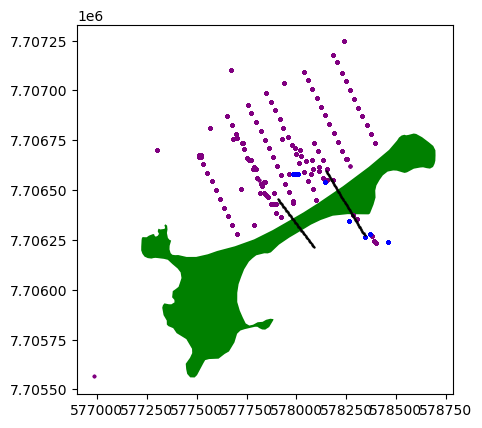

In [20]:
tukmask = gpd.read_file(dir+'tuk_mask.shp', crs=32608)
tukmask_buffer = tukmask.buffer(1000)
fig, ax = plt.subplots()
#tukmask_buffer.plot(ax=ax, facecolor="none", edgecolor="green")
tukmask.plot(ax=ax, color='green')
AML_25601.plot(ax=ax, marker='o', color='purple', markersize=3)
AML_26115_filtered.plot(ax=ax, marker='o', color='blue', markersize=3)
eastern_transect.plot(ax=ax, marker='.', color='black', markersize=2)
western_transect.plot(ax=ax, marker='.', color='black', markersize=2)
tukmask_buffer_gdf = gpd.GeoDataFrame(geometry=tukmask_buffer)

In [21]:
#select points near the coastline

AML_25601_coast = gpd.overlay(AML_25601, tukmask_buffer_gdf, how='intersection')
AML_26115_coast = gpd.overlay(AML_26115, tukmask_buffer_gdf, how='intersection')
AML_all = pd.concat([AML_25601_coast, AML_26115_coast])
#AML_all = pd.concat([AML_25601, AML_26115])

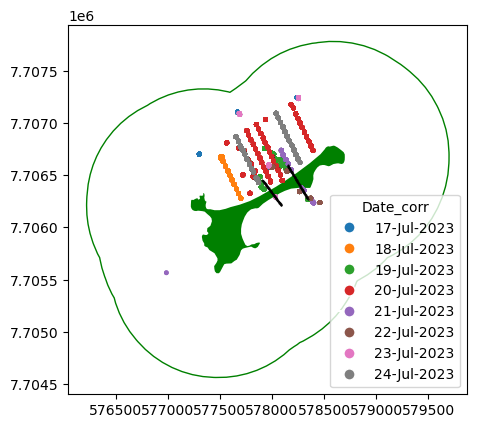

In [22]:

from matplotlib.colors import ListedColormap

# Define a list of unique dates
unique_dates = sorted(AML_all['Date_corr'].unique())

# Define a categorical colormap with a unique color for each date
num_colors = len(unique_dates)
colors = plt.cm.tab10.colors[:num_colors]  # Choose a colormap with enough colors
cmap = ListedColormap(colors)

# Plot the figure
fig, ax = plt.subplots()
tukmask_buffer.plot(ax=ax, facecolor="none", edgecolor="green")
tukmask.plot(ax=ax, color='green')
# Plot AML_all points with colors based on Date_corr
AML_all.plot(ax=ax, marker='o', column='Date_corr', cmap=cmap, legend=True, markersize=6)
eastern_transect.plot(ax=ax, marker='.', color='black', markersize=1)
western_transect.plot(ax=ax, marker='.', color='black', markersize=1)

# Add legend for reference
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=date) 
           for date, color in zip(unique_dates, colors)]
plt.legend(handles=handles, title='Date_corr', loc='lower right')

plt.show()


In [23]:
# Define the list of dates you want to extract
dates_to_extract = ['18-Jul-2023', '19-Jul-2023', '23-Jul-2023']

# Create a subset containing only the rows where Date_corr matches the specified dates
AML_all_dates = AML_all[AML_all['Date_corr'].isin(dates_to_extract)]


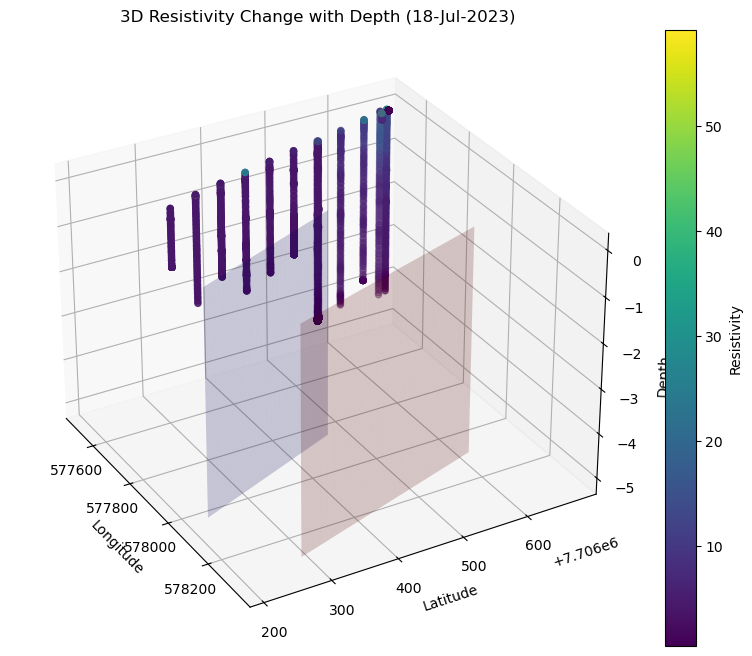

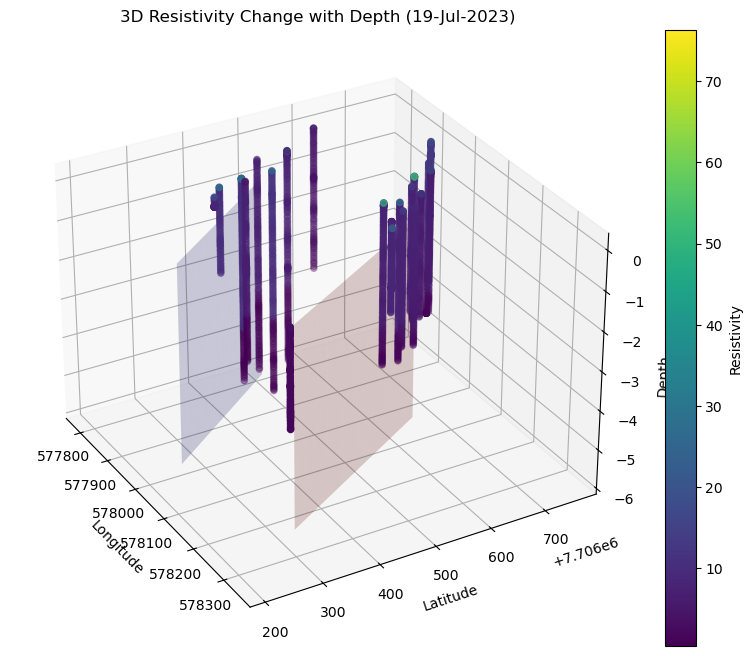

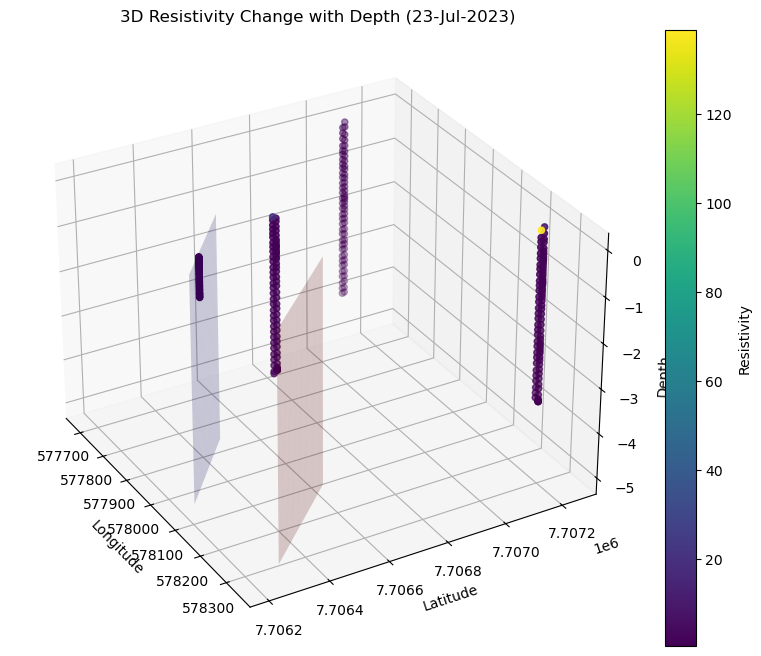

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define the list of dates you want to plot separately
dates_to_plot = ['18-Jul-2023', '19-Jul-2023', '23-Jul-2023']

# Iterate over each date and create a separate 3D plot
for date in dates_to_plot:
    # Select data for the current date
    group = AML_all_dates[AML_all_dates['Date_corr'] == date]
    
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Extract x, y, and resistivity values
    x = group.geometry.x
    y = group.geometry.y
    depth = group['depth']  # Assuming depth is a column indicating depth
    resistivity = group['Resistivity_Ohm_m']  # Assuming resistivity is a column
    
    # Define colors based on resistivity values
    norm = plt.Normalize(resistivity.min(), resistivity.max())
    colors = plt.cm.viridis(norm(resistivity))
    
    # Plot scatter plot with color representing resistivity
    ax.scatter(x, y, depth, c=colors, marker='o')
    
    # Plot western_transect
    x_western = western_transect.geometry.x
    y_western = western_transect.geometry.y
    z_western = np.linspace(-5, 0, 100)
    X_western, Z_western = np.meshgrid(x_western, z_western)
    Y_western = np.meshgrid(y_western, z_western)[0]
    ax.plot_surface(X_western, Y_western, Z_western, color='blue', alpha=0.2)

    # Plot eastern_transect
    x_eastern = eastern_transect.geometry.x
    y_eastern = eastern_transect.geometry.y
    z_eastern = np.linspace(-5, 0, 100)
    X_eastern, Z_eastern = np.meshgrid(x_eastern, z_eastern)
    Y_eastern = np.meshgrid(y_eastern, z_eastern)[0]
    ax.plot_surface(X_eastern, Y_eastern, Z_eastern, color='red', alpha=0.2)

    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Depth')
    ax.set_title(f'3D Resistivity Change with Depth ({date})')

    # Add a colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Resistivity')

    ax.view_init(elev=30, azim=-30)
    
    # Show plot
    plt.show()


In [25]:
eastern_transect_line = gpd.read_file(dir+'eastern_transect_line.shp', crs=32608)
eastern_transect_buffer = eastern_transect_line.buffer(40)
western_transect_line = gpd.read_file(dir+'western_transect_line.shp', crs=32608)
western_transect_buffer = western_transect_line.buffer(40)

eastern_transect_buffer = gpd.GeoDataFrame(geometry=eastern_transect_buffer)
western_transect_buffer = gpd.GeoDataFrame(geometry=western_transect_buffer)
both_buffer = pd.concat([eastern_transect_buffer, western_transect_buffer])

AML_25601_ctd = gpd.overlay(AML_25601, both_buffer, how='intersection')
AML_26115_ctd = gpd.overlay(AML_26115, both_buffer, how='intersection')
AML_all_ctd = pd.concat([AML_25601_ctd, AML_26115_ctd])
AML_all_ctd.to_file(dir+'AML_all_ctd.shp')

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_27660\874030939.py:13: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  AML_all_ctd.to_file(dir+'AML_all_ctd.shp')


In [26]:
split= gpd.read_file(dir+'splitline.shp', crs=32608)
north_buffer = split.buffer(250, single_sided=True)
north_buffer = gpd.GeoDataFrame(geometry=north_buffer)
south_buffer = split.buffer(-250, single_sided=True)
south_buffer = gpd.GeoDataFrame(geometry=south_buffer)
AML_all_dates_north = gpd.overlay(AML_all_dates, north_buffer, how='intersection')
AML_all_dates_south = gpd.overlay(AML_all_dates, south_buffer, how='intersection')

NameError: name 'AML_all_dates_north_filtered' is not defined

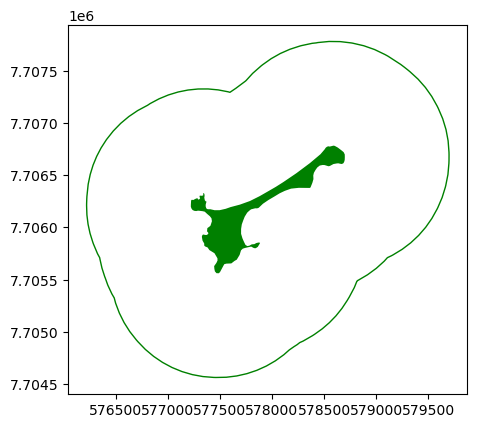

In [16]:
from shapely.geometry import Point
import random

fig, ax = plt.subplots()
tukmask_buffer.plot(ax=ax, facecolor="none", edgecolor="green")
tukmask.plot(ax=ax, color='green')
AML_all_dates_north_filtered.plot(ax=ax, marker='o', color='purple', markersize=3, label='station')

eastern_transect.plot(ax=ax, marker='.', color='black', markersize=2)
western_transect.plot(ax=ax, marker='.', color='black', markersize=2)

# Add station labels
# Add station labels
for idx, row in AML_all_dates_north_filtered.iterrows():
    ax.text(row.geometry.x, row.geometry.y, f'{row["Station"]}', color='black', fontsize=6.5)  # Adjust fontsize as needed

plt.show()


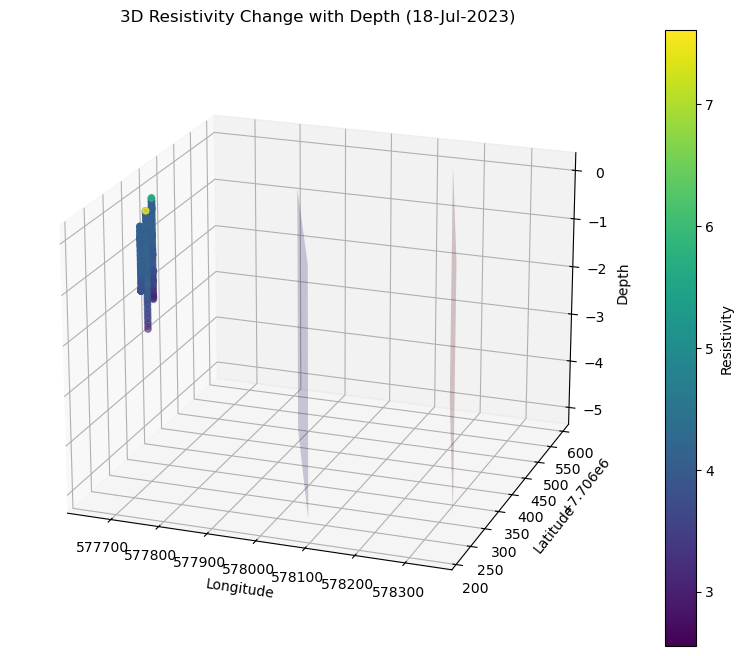

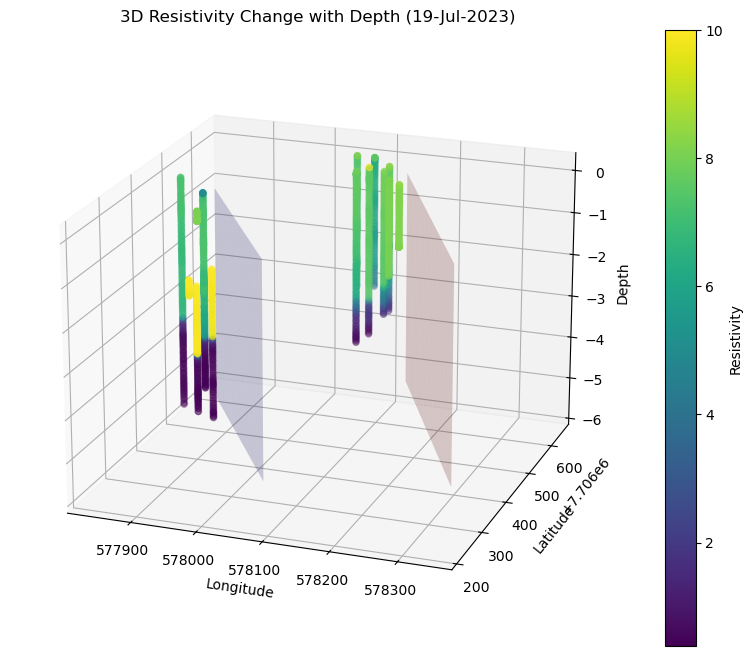

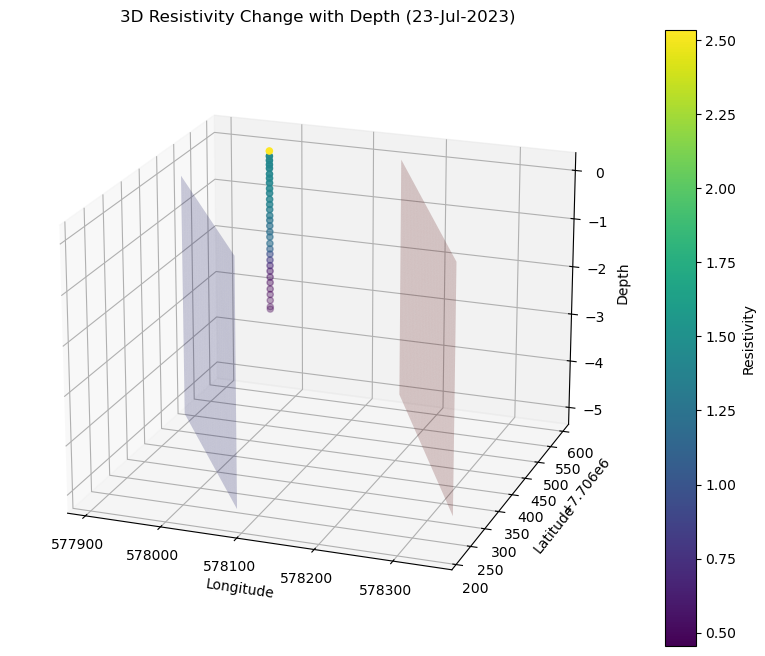

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

AML_all_dates_north_filtered = AML_all_dates_north[AML_all_dates_north['Resistivity_Ohm_m'] <= 10]
# Define the list of dates you want to plot separately
dates_to_plot = ['18-Jul-2023', '19-Jul-2023', '23-Jul-2023']

# Iterate over each date and create a separate 3D plot
for date in dates_to_plot:
    # Select data for the current date
    group = AML_all_dates_north_filtered[AML_all_dates_north_filtered['Date_corr'] == date]
    
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Extract x, y, and resistivity values
    x = group.geometry.x
    y = group.geometry.y
    depth = group['depth']  # Assuming depth is a column indicating depth
    resistivity = group['Resistivity_Ohm_m']  # Assuming resistivity is a column
    
    # Define colors based on resistivity values
    norm = plt.Normalize(resistivity.min(), resistivity.max())
    colors = plt.cm.viridis(norm(resistivity))
    
    # Plot scatter plot with color representing resistivity
    ax.scatter(x, y, depth, c=colors, marker='o')
    
    # Plot western_transect
    x_western = western_transect.geometry.x
    y_western = western_transect.geometry.y
    z_western = np.linspace(-5, 0, 100)
    X_western, Z_western = np.meshgrid(x_western, z_western)
    Y_western = np.meshgrid(y_western, z_western)[0]
    ax.plot_surface(X_western, Y_western, Z_western, color='blue', alpha=0.2)

    # Plot eastern_transect
    x_eastern = eastern_transect.geometry.x
    y_eastern = eastern_transect.geometry.y
    z_eastern = np.linspace(-5, 0, 100)
    X_eastern, Z_eastern = np.meshgrid(x_eastern, z_eastern)
    Y_eastern = np.meshgrid(y_eastern, z_eastern)[0]
    ax.plot_surface(X_eastern, Y_eastern, Z_eastern, color='red', alpha=0.2)

    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_zlabel('Depth')
    ax.set_title(f'3D Resistivity Change with Depth ({date})')

    # Add a colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Resistivity')

    ax.view_init(elev=20, azim=-70)
    
    # Show plot
    plt.show()


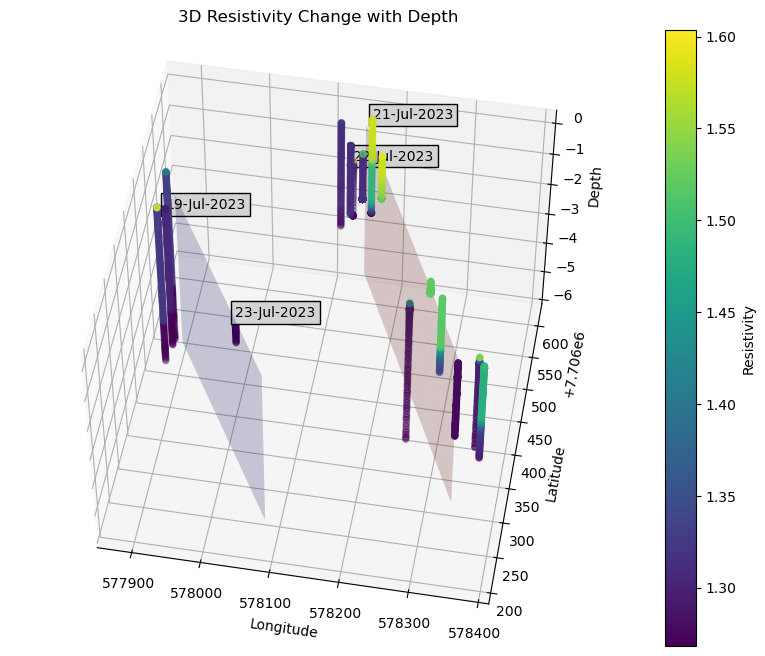

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Group the points by Station
station_groups = AML_all_ctd.groupby('Date_corr')

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Loop through each station group
for station, group in station_groups:
    # Extract x, y, and resistivity values
    x = group.geometry.x
    y = group.geometry.y
    depth = group['depth']  # Assuming depth is a column indicating depth
    resistivity = group['Resistivity_Ohm_m']  # Assuming resistivity is a column
    
    # Define colors based on resistivity values
    norm = plt.Normalize(resistivity.min(), resistivity.max())
    colors = plt.cm.viridis(norm(resistivity))
    
    # Plot scatter plot with color representing resistivity
    ax.scatter(x, y, depth, c=colors, marker='o', label=f'{station}')
     # Add station labels with background color
    text_x, text_y, text_z = x.iloc[0], y.iloc[0], depth.iloc[0]
    ax.text(text_x, text_y, text_z, f'{station}', color='black')
    bbox_props = dict(boxstyle='square,pad=0.3', fc='lightgray', ec='black', lw=1)
    ax.text(text_x, text_y, text_z, f'{station}', color='black', bbox=bbox_props)

default_z = 0
x_western = western_transect.geometry.x
y_western = western_transect.geometry.y
z_western = np.linspace(-5, 0, 100)
X_western, Z_western = np.meshgrid(x_western, z_western)
Y_western = np.meshgrid(y_western, z_western)[0]
ax.plot_surface(X_western, Y_western, Z_western, color='blue', alpha=0.2)

# Plot eastern_transect
x_eastern = eastern_transect.geometry.x
y_eastern = eastern_transect.geometry.y
z_eastern = np.linspace(-5, 0, 100)
X_eastern, Z_eastern = np.meshgrid(x_eastern, z_eastern)
Y_eastern = np.meshgrid(y_eastern, z_eastern)[0]
ax.plot_surface(X_eastern, Y_eastern, Z_eastern, color='red', alpha=0.2)

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Depth')
ax.set_title('3D Resistivity Change with Depth')

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Resistivity')

ax.view_init(elev=50, azim=-80)
# Show plot
plt.show()


C:\Users\mealiy001\AppData\Local\Temp\ipykernel_27660\3299666936.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


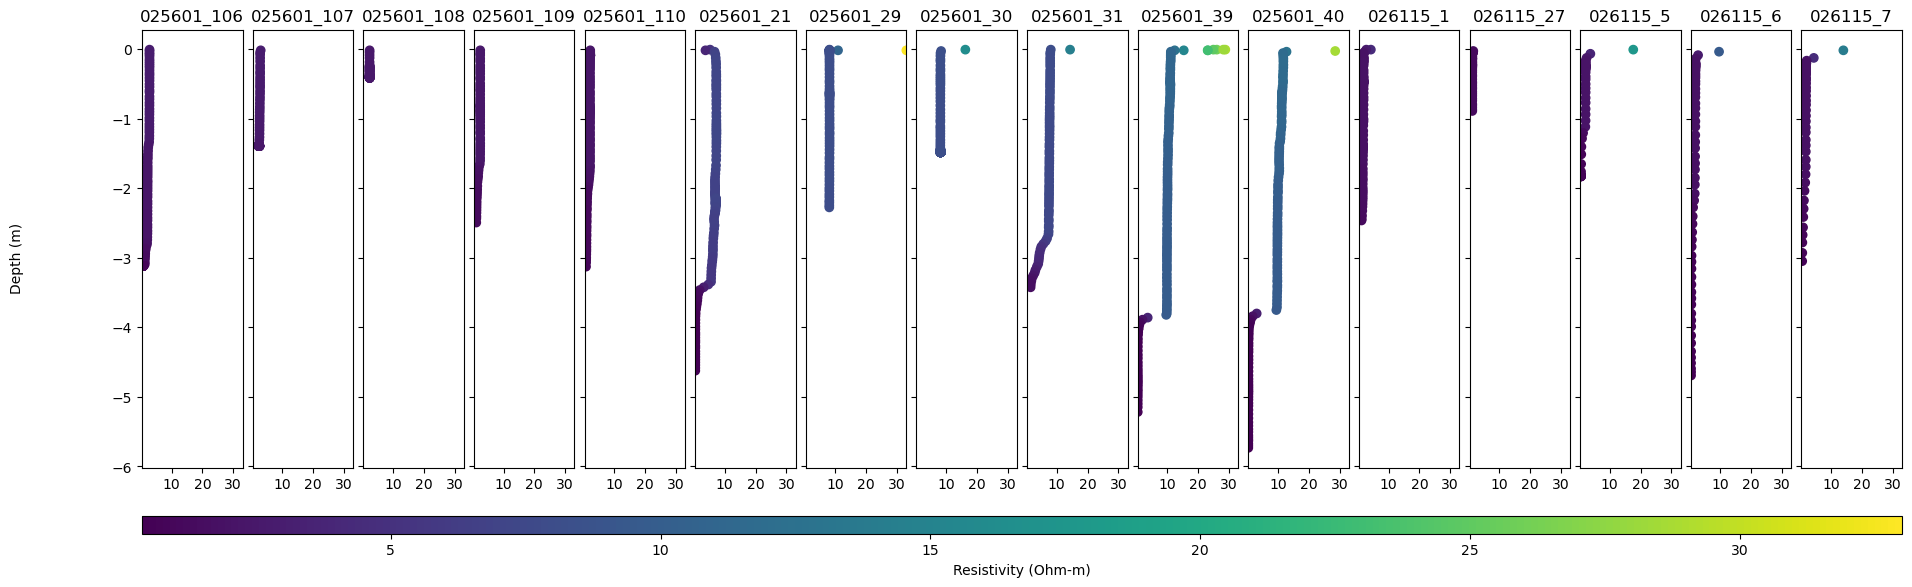

In [29]:
import matplotlib.pyplot as plt
import numpy as np

AML_all_ctd_filtered = AML_all_ctd[AML_all_ctd['Resistivity_Ohm_m'] <= 40]

# Group the points by Station
station_groups = AML_all_ctd_filtered.groupby('Station')

# Calculate overall minimum and maximum resistivity values
overall_min_resistivity = AML_all_ctd_filtered['Resistivity_Ohm_m'].min()
overall_max_resistivity = AML_all_ctd_filtered['Resistivity_Ohm_m'].max()

# Create a figure with subplots
num_stations = len(station_groups)
num_cols = num_stations
fig, axes = plt.subplots(1, num_cols, figsize=(22, 6), sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0.1})

# Define color map
norm = plt.Normalize(overall_min_resistivity, overall_max_resistivity)
cmap = plt.cm.viridis
# Create a figure with subplots


# Loop through each station group
for i, (station, group) in enumerate(station_groups):
    # Extract depth and resistivity values
    depth = group['depth']  # Assuming depth is a column indicating depth
    resistivity = group['Resistivity_Ohm_m']  # Assuming resistivity is a column
    
    # Plot resistivity per depth for each station
    sc = axes[i].scatter(resistivity, depth, c=resistivity, cmap=cmap, marker='o', label=f'Station {station}', vmin=overall_min_resistivity, vmax=overall_max_resistivity)
    
    # Set labels and title for each subplot
    #axes[i].set_xlabel('Resistivity (Ohm-m)')  # Labeling x-axis
    #axes[i].set_ylabel('Depth (m)')  # Labeling y-axis
    axes[i].set_title(f'{station}')
    
    # Set x-axis limits to ensure consistency across all subplots
    axes[i].set_xlim(overall_min_resistivity, overall_max_resistivity)

# Add overall labels and title
fig.text(0.04, 0.5, 'Depth (m)', va='center', rotation='vertical')

# Create a single horizontal colorbar underneath the subplots
cbar_ax = fig.add_axes([0.1, 0.04, 0.8, 0.03])  # [left, bottom, width, height]
cbar = plt.colorbar(sc, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Resistivity (Ohm-m)')  # Corrected label

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15)  # Adjusting left and right margins

# Show plot
plt.tight_layout()
plt.show()



c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\geopandas\geodataframe.py:1459: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_27660\2318568763.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


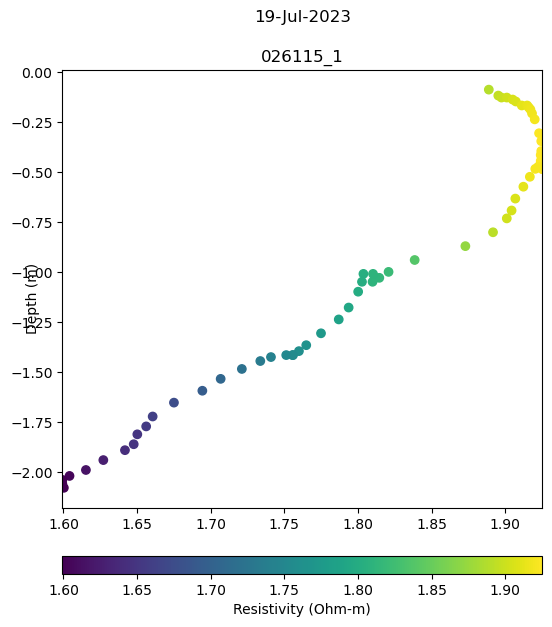

c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\geopandas\geodataframe.py:1459: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_27660\2318568763.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


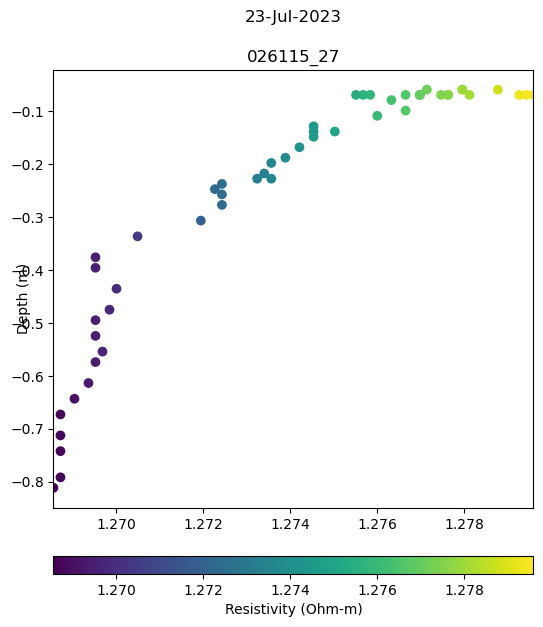

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming AML_all_ctd is your data frame and 'Date' is a column representing dates
dates_to_plot = ['19-Jul-2023', '23-Jul-2023']

for date in dates_to_plot:
    # Filter data for the current date
    AML_all_dates_south_filtered = AML_all_dates_south[(AML_all_dates_north['depth'] <= -0.2) & (AML_all_dates_south['Date_corr'] == date)]

    # Group the points by Station
    station_groups = AML_all_dates_south_filtered.groupby('Station')

    # Check if there are station groups for the current date
    if len(station_groups) == 0:
        print(f"No data available for {date}. Skipping plotting.")
        continue

    # Calculate overall minimum and maximum resistivity values
    overall_min_resistivity = AML_all_dates_south_filtered['Resistivity_Ohm_m'].min()
    overall_max_resistivity = AML_all_dates_south_filtered['Resistivity_Ohm_m'].max()

 # Create a figure with subplots
    num_stations = len(station_groups)
    fig, axes = plt.subplots(1, num_stations, figsize=(6, 6), sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0.1})

    # Ensure axes is always a list
    axes = np.atleast_1d(axes)

    # Define color map
    norm = plt.Normalize(overall_min_resistivity, overall_max_resistivity)
    cmap = plt.cm.viridis

    # Loop through each station group
    for i, (station, group) in enumerate(station_groups):
        # Extract depth and resistivity values
        depth = group['depth']  # Assuming depth is a column indicating depth
        resistivity = group['Resistivity_Ohm_m']  # Assuming resistivity is a column
        
        # Plot resistivity per depth for each station
        sc = axes[i].scatter(resistivity, depth, c=resistivity, cmap=cmap, marker='o', label=f'Station {station}', vmin=overall_min_resistivity, vmax=overall_max_resistivity)
        
        # Set labels and title for each subplot
        # axes[i].set_xlabel('Resistivity (Ohm-m)')  # Labeling x-axis
        # axes[i].set_ylabel('Depth (m)')  # Labeling y-axis
        axes[i].set_title(f'{station}')
        
        # Set x-axis limits to ensure consistency across all subplots
        axes[i].set_xlim(overall_min_resistivity, overall_max_resistivity)

    # Add overall labels and title
    fig.text(0.04, 0.5, 'Depth (m)', va='center', rotation='vertical')

    # Create a single horizontal colorbar underneath the subplots
    cbar_ax = fig.add_axes([0.1, 0.04, 0.8, 0.03])  # [left, bottom, width, height]
    cbar = plt.colorbar(sc, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Resistivity (Ohm-m)')  # Corrected label

    # Adjust layout to prevent overlap
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15)  # Adjusting left and right margins

    # Set title for the figure
    fig.suptitle(date)

    # Show plot
    plt.tight_layout()
    plt.show()


C:\Users\mealiy001\AppData\Local\Temp\ipykernel_27660\4131146450.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


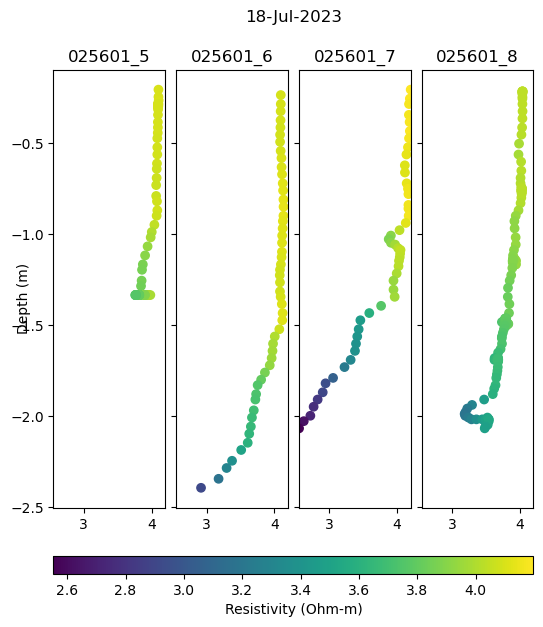

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_27660\4131146450.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


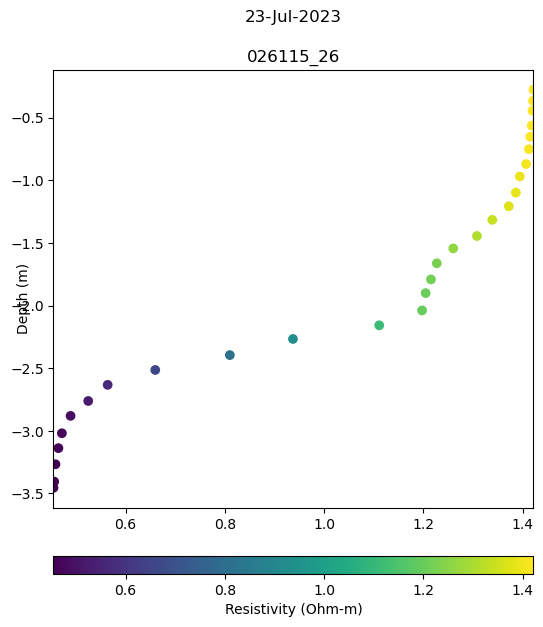

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming AML_all_ctd is your data frame and 'Date' is a column representing dates
dates_to_plot = ['18-Jul-2023', '23-Jul-2023']

for date in dates_to_plot:
    # Filter data for the current date
    AML_all_dates_north_filtered = AML_all_dates_north[(AML_all_dates_north['depth'] <= -0.2) & (AML_all_dates_north['Date_corr'] == date)]

    # Group the points by Station
    station_groups = AML_all_dates_north_filtered.groupby('Station')

    # Check if there are station groups for the current date
    if len(station_groups) == 0:
        print(f"No data available for {date}. Skipping plotting.")
        continue

    # Calculate overall minimum and maximum resistivity values
    overall_min_resistivity = AML_all_dates_north_filtered['Resistivity_Ohm_m'].min()
    overall_max_resistivity = AML_all_dates_north_filtered['Resistivity_Ohm_m'].max()

 # Create a figure with subplots
    num_stations = len(station_groups)
    fig, axes = plt.subplots(1, num_stations, figsize=(6, 6), sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0.1})

    # Ensure axes is always a list
    axes = np.atleast_1d(axes)

    # Define color map
    norm = plt.Normalize(overall_min_resistivity, overall_max_resistivity)
    cmap = plt.cm.viridis

    # Loop through each station group
    for i, (station, group) in enumerate(station_groups):
        # Extract depth and resistivity values
        depth = group['depth']  # Assuming depth is a column indicating depth
        resistivity = group['Resistivity_Ohm_m']  # Assuming resistivity is a column
        
        # Plot resistivity per depth for each station
        sc = axes[i].scatter(resistivity, depth, c=resistivity, cmap=cmap, marker='o', label=f'Station {station}', vmin=overall_min_resistivity, vmax=overall_max_resistivity)
        
        # Set labels and title for each subplot
        # axes[i].set_xlabel('Resistivity (Ohm-m)')  # Labeling x-axis
        # axes[i].set_ylabel('Depth (m)')  # Labeling y-axis
        axes[i].set_title(f'{station}')
        
        # Set x-axis limits to ensure consistency across all subplots
        axes[i].set_xlim(overall_min_resistivity, overall_max_resistivity)

    # Add overall labels and title
    fig.text(0.04, 0.5, 'Depth (m)', va='center', rotation='vertical')

    # Create a single horizontal colorbar underneath the subplots
    cbar_ax = fig.add_axes([0.1, 0.04, 0.8, 0.03])  # [left, bottom, width, height]
    cbar = plt.colorbar(sc, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Resistivity (Ohm-m)')  # Corrected label

    # Adjust layout to prevent overlap
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.15)  # Adjusting left and right margins

    # Set title for the figure
    fig.suptitle(date)

    # Show plot
    plt.tight_layout()
    plt.show()


In [46]:
dir

'//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [47]:
AML_all_dates_south_filtered = AML_all_dates_south[(AML_all_dates_south['depth'] <= -0.2) & ((AML_all_dates_south['Date_corr'] == '19-Jul-2023') | (AML_all_dates_south['Date_corr'] =='23-Jul-2023'))]
AML_all_dates_north_filtered = AML_all_dates_north[(AML_all_dates_north['depth'] <= -0.2) & ((AML_all_dates_north['Date_corr'] == '18-Jul-2023') | (AML_all_dates_north['Date_corr'] =='23-Jul-2023'))]
AML_all_dates_filtered = pd.concat([AML_all_dates_south_filtered, AML_all_dates_north_filtered])
AML_all_dates_filtered.to_csv(dir+"CTD/AML_all_dates_filtered.csv")
station_groups = AML_all_dates_filtered.groupby('Station')

AttributeError: 'numpy.ndarray' object has no attribute 'set_xticklabels'

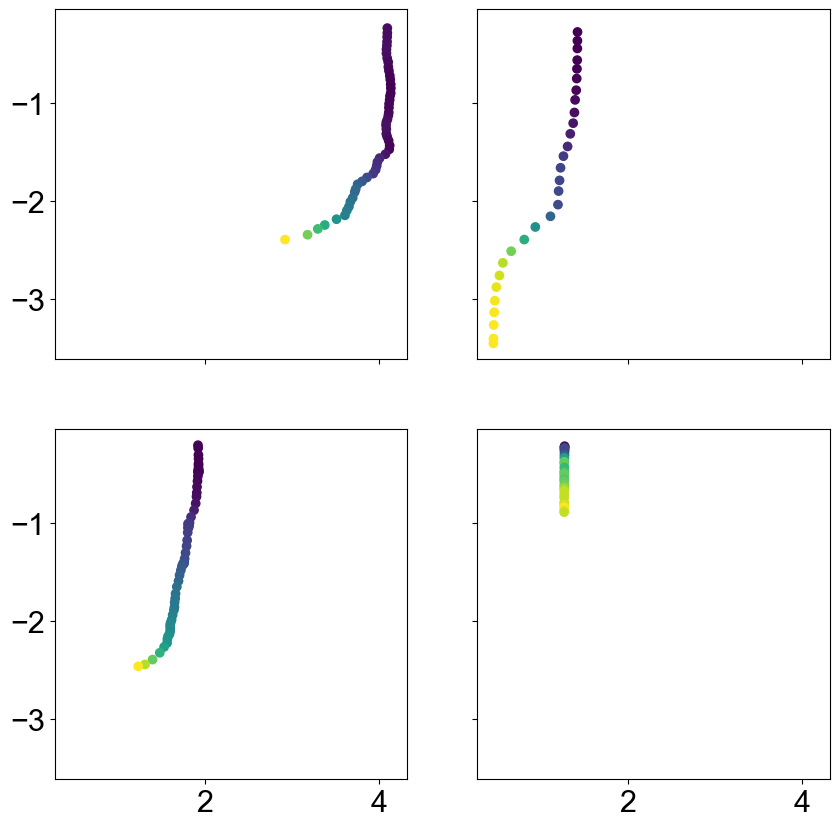

In [35]:
plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'Arial'


overall_min_resistivity = AML_all_dates_filtered['Resistivity_Ohm_m'].min()
overall_max_resistivity = AML_all_dates_filtered['Resistivity_Ohm_m'].max()
norm = plt.Normalize(overall_min_resistivity, overall_max_resistivity)
cmap = plt.cm.viridis_r
# Create a 2x2 subplot grid
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey=True, sharex=True)

east_north1 = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '025601_5']
east_north2 = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '025601_6']
east_north3 = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '025601_7']
east_north4 = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '025601_8']
east_south =AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '026115_1']
west_north = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '026115_26']
west_south = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '026115_27']


ax[0, 0].scatter(east_north2['Resistivity_Ohm_m'], east_north2['depth'], c=east_north2['Resistivity_Ohm_m'], cmap=cmap)
ax[0, 1].scatter(west_north['Resistivity_Ohm_m'], west_north['depth'], c=west_north['Resistivity_Ohm_m'], cmap=cmap)
ax[1, 0].scatter(east_south['Resistivity_Ohm_m'], east_south['depth'], c=east_south['Resistivity_Ohm_m'], cmap=cmap)
ax[1, 1].scatter(west_south['Resistivity_Ohm_m'], west_south['depth'], c=west_south['Resistivity_Ohm_m'], cmap=cmap)

for i in range(4):
    ax[i].set_xticklabels([])  # Remove x-axis labels
    ax[i].set_xticks([])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
cax = fig.add_axes([0.1, 0.1, 0.88, 0.05]) 
fig.colorbar(sm, cax=cax, orientation='horizontal', label='Resistivity (Ohm-m)')
ax[0].set_xlim(0, 1)
ax[0].set_ylim(-4, 0)
ax[0].set_ylabel("Depth (m)")
ax[0].set_title("Eastern, \nnorthshore", fontsize=20)

ax[1].set_title("Western, \nnorthshore", fontsize=20)
ax[2].set_title("Eastern, \nsouthshore", fontsize=20)
ax[3].set_title("Western, \nsouthshore", fontsize=20)

plt.subplots_adjust(right=0.95, bottom=0.2)

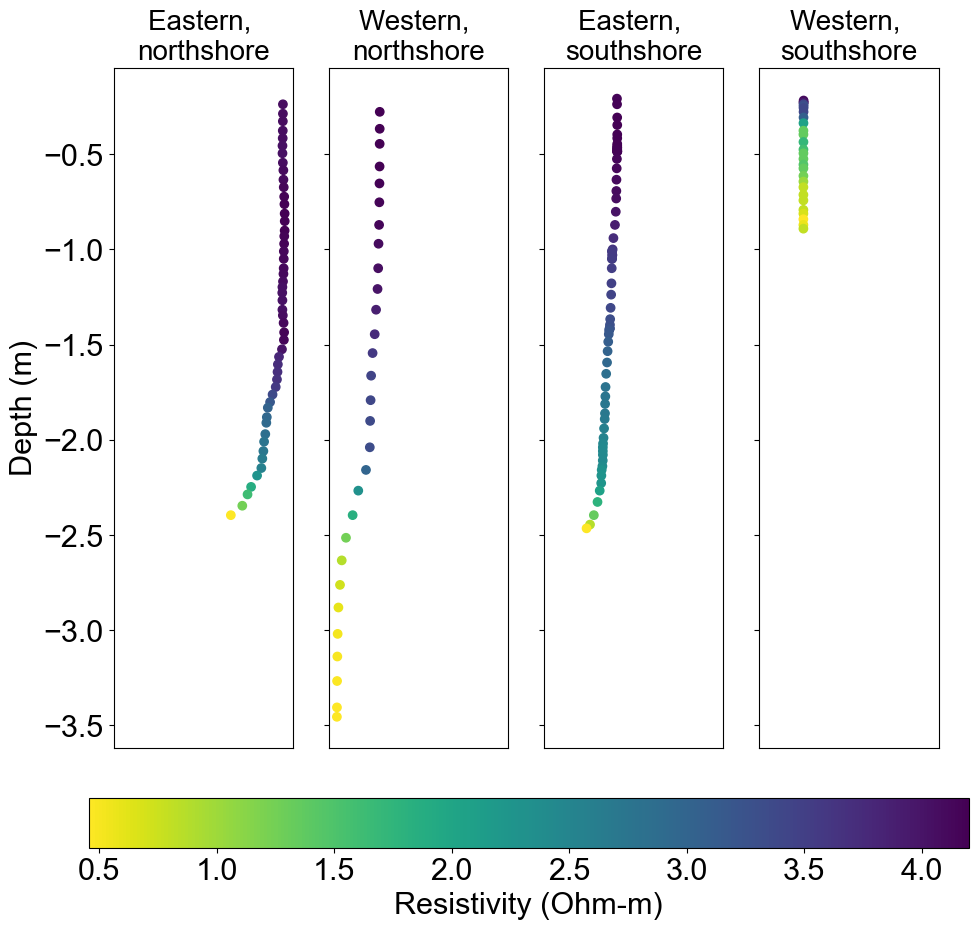

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming AML_all_dates_filtered is already defined
plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'Arial'

# Get overall min and max resistivity for normalization
overall_min_resistivity = AML_all_dates_filtered['Resistivity_Ohm_m'].min()
overall_max_resistivity = AML_all_dates_filtered['Resistivity_Ohm_m'].max()
norm = plt.Normalize(overall_min_resistivity, overall_max_resistivity)
cmap = plt.cm.viridis_r

# Create a 2x2 subplot grid
fig, ax = plt.subplots(1, 4, figsize=(10, 10), sharey=True, sharex=True)

# Filter the stations
east_north1 = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '025601_5']
east_north2 = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '025601_6']
east_north3 = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '025601_7']
east_north4 = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '025601_8']
east_south = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '026115_1']
west_north = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '026115_26']
west_south = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '026115_27']

# Plotting the "wide bar" plots
#ax[0, 0].barh(east_north1['depth'], [1] * len(east_north1), color=cmap(norm(east_north1['Resistivity_Ohm_m'])))
ax[0].scatter(east_north2['Resistivity_Ohm_m'], east_north2['depth'], c=east_north2['Resistivity_Ohm_m'], cmap=cmap)
#ax[0, 0].barh(east_north3['depth'], [3] * len(east_north3), color=cmap(norm(east_north3['Resistivity_Ohm_m'])))
#ax[0, 0].barh(east_north4['depth'], [4] * len(east_north4), color=cmap(norm(east_north4['Resistivity_Ohm_m'])))

ax[1].scatter(west_north['Resistivity_Ohm_m'], west_north['depth'], c=west_north['Resistivity_Ohm_m'], cmap=cmap)

ax[2].scatter(east_south['Resistivity_Ohm_m'], east_south['depth'], c=east_south['Resistivity_Ohm_m'], cmap=cmap)

ax[3].scatter(west_south['Resistivity_Ohm_m'], west_south['depth'], c=west_south['Resistivity_Ohm_m'], cmap=cmap)

for i in range(4):
    ax[i].set_xticklabels([])  # Remove x-axis labels
    ax[i].set_xticks([])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
cax = fig.add_axes([0.1, 0.1, 0.88, 0.05]) 
fig.colorbar(sm, cax=cax, orientation='horizontal', label='Resistivity (Ohm-m)')
#ax[0].set_xlim(0, 1)
#ax[0].set_ylim(-4, 0)
ax[0].set_ylabel("Depth (m)")
ax[0].set_title("Eastern, \nnorthshore", fontsize=20)

ax[1].set_title("Western, \nnorthshore", fontsize=20)
ax[2].set_title("Eastern, \nsouthshore", fontsize=20)
ax[3].set_title("Western, \nsouthshore", fontsize=20)

plt.subplots_adjust(right=0.95, bottom=0.2)
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'
plt.savefig(dir+'paper/figures/ctd.png')

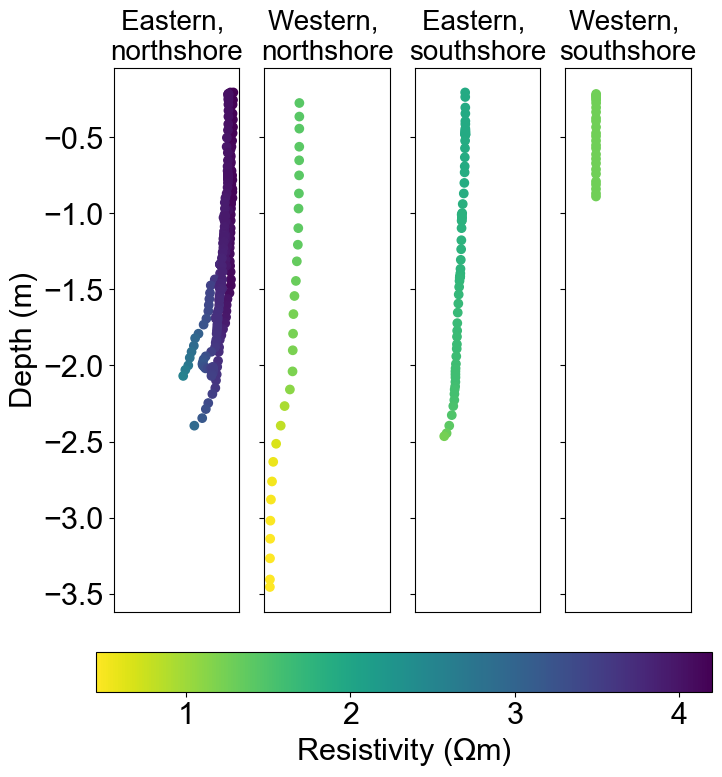

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming AML_all_dates_filtered is already defined
plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'Arial'

# Get overall min and max resistivity for normalization
overall_min_resistivity = AML_all_dates_filtered['Resistivity_Ohm_m'].min()
overall_max_resistivity = AML_all_dates_filtered['Resistivity_Ohm_m'].max()
norm = plt.Normalize(overall_min_resistivity, overall_max_resistivity)
cmap = plt.cm.viridis_r

# Create a 1x4 subplot grid
fig, ax = plt.subplots(1, 4, figsize=(7, 8), sharey=True, sharex=True)

# Filter the stations
east_north1 = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '025601_5']
east_north2 = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '025601_6']
east_north3 = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '025601_7']
east_north4 = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '025601_8']
east_south = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '026115_1']
west_north = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '026115_26']
west_south = AML_all_dates_filtered[AML_all_dates_filtered['Station'] == '026115_27']

# Plotting scatter plots with consistent colormap normalization
ax[0].scatter(east_north1['Resistivity_Ohm_m'], east_north1['depth'], 
              c=east_north1['Resistivity_Ohm_m'], cmap=cmap, norm=norm)
ax[0].scatter(east_north2['Resistivity_Ohm_m'], east_north2['depth'], 
              c=east_north2['Resistivity_Ohm_m'], cmap=cmap, norm=norm)
ax[0].scatter(east_north3['Resistivity_Ohm_m'], east_north3['depth'], 
              c=east_north3['Resistivity_Ohm_m'], cmap=cmap, norm=norm)
ax[0].scatter(east_north4['Resistivity_Ohm_m'], east_north4['depth'], 
              c=east_north4['Resistivity_Ohm_m'], cmap=cmap, norm=norm)

ax[1].scatter(west_north['Resistivity_Ohm_m'], west_north['depth'], 
              c=west_north['Resistivity_Ohm_m'], cmap=cmap, norm=norm)
ax[2].scatter(east_south['Resistivity_Ohm_m'], east_south['depth'], 
              c=east_south['Resistivity_Ohm_m'], cmap=cmap, norm=norm)
ax[3].scatter(west_south['Resistivity_Ohm_m'], west_south['depth'], 
              c=west_south['Resistivity_Ohm_m'], cmap=cmap, norm=norm)

# Remove x-axis labels and ticks
for i in range(4):
    ax[i].set_xticklabels([])
    ax[i].set_xticks([])

# Create a colorbar with correct normalization
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
cax = fig.add_axes([0.1, 0.1, 0.88, 0.05]) 
fig.colorbar(sm, cax=cax, orientation='horizontal', label='Resistivity ($\Omega$m)')

# Set labels and titles
ax[0].set_ylabel("Depth (m)")
ax[0].set_title("Eastern, \nnorthshore", fontsize=20)
ax[1].set_title("Western, \nnorthshore", fontsize=20)
ax[2].set_title("Eastern, \nsouthshore", fontsize=20)
ax[3].set_title("Western, \nsouthshore", fontsize=20)

plt.subplots_adjust(right=0.95, bottom=0.2)
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'
plt.savefig(dir+'paper/figures/ctd.png')